# Implementation of linear models for inbuilt sklearn datasets

In [1]:
import sklearn
from sklearn.datasets import load_boston
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
boston=load_boston()

In [3]:
boston.keys()

dict_keys(['target', 'data', 'feature_names', 'DESCR'])

In [4]:
boston['DESCR']

"Boston House Prices dataset\n===========================\n\nNotes\n------\nData Set Characteristics:  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive\n    \n    :Median Value (attribute 14) is usually the target\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000\n

In [4]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
boston['target'].shape

(506,)

In [6]:
boston['data'].shape

(506, 13)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(boston['data'],boston['target'],random_state=66)

## 1. Linear Regression

In [8]:
model1=LinearRegression()
model1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
print("Training R2 is {}".format(model1.score(X_train,y_train)))
print("Test R2 is {}".format(model1.score(X_test,y_test)))

Training R2 is 0.7126231045950853
Test R2 is 0.8171476649093012


In [10]:
print("Model coefficients: {}".format(model1.coef_))
print("Model intercept : {}".format(model1.intercept_))

Model coefficients: [-1.20479243e-01  4.88212582e-02  2.79193862e-02  2.13540591e+00
 -1.92657528e+01  3.24805115e+00 -4.95897277e-03 -1.66157655e+00
  2.96647072e-01 -1.19849170e-02 -9.94845386e-01  8.49563938e-03
 -5.42334557e-01]
Model intercept : 43.15225443330819


## 2. Ridge Regression

In [11]:
model2=Ridge()
model2.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
print("Training R2 is {}".format(model2.score(X_train,y_train)))
print("Test R2 is {}".format(model2.score(X_test,y_test)))

Training R2 is 0.7097468757879339
Test R2 is 0.8177444112957746


In [13]:
print("Model coefficients: {}".format(model2.coef_))
print("Model intercept : {}".format(model2.intercept_))

Model coefficients: [-1.15460697e-01  5.07949249e-02 -7.62053173e-03  1.98636374e+00
 -1.05105719e+01  3.29251653e+00 -1.17907012e-02 -1.53123768e+00
  2.80924035e-01 -1.31655449e-02 -8.93455216e-01  8.55192097e-03
 -5.55364364e-01]
Model intercept : 37.2513856034339


### A higher alpha leads to a more restricted model thus the coeffcients should be lower.

In [14]:
model3=Ridge(alpha=10)
model3.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [15]:
print("Training R2 is {}".format(model3.score(X_train,y_train)))
print("Test R2 is {}".format(model3.score(X_test,y_test)))

Training R2 is 0.7010340234112235
Test R2 is 0.80892944322821


In [16]:
print("Model coefficients: {}".format(model3.coef_))
print("Model intercept : {}".format(model3.intercept_))

Model coefficients: [-0.11035869  0.05343057 -0.04091212  1.4509453  -2.05443645  3.11958421
 -0.01623356 -1.39715096  0.27408182 -0.01468607 -0.80674493  0.00848818
 -0.58419694]
Model intercept : 33.26967359881769


## 3.Lasso Regression

In [17]:
model4=Lasso()
model4.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
print("Training R2 is {}".format(model4.score(X_train,y_train)))
print("Test R2 is {}".format(model4.score(X_test,y_test)))

Training R2 is 0.6534405891043571
Test R2 is 0.7240140081042594


In [19]:
print("Model coefficients: {}".format(model4.coef_))
print("Model intercept : {}".format(model4.intercept_))

Model coefficients: [-0.05023553  0.04952053 -0.          0.         -0.          0.51743439
  0.01551993 -0.75023731  0.2303442  -0.0147793  -0.69879894  0.00542233
 -0.7798394 ]
Model intercept : 45.41851695533833


### Lasso uses L1 regularization and sets the coefficients of some features to zero. Decreasing the alpha will lead to less restrictions on the model with fewer coeffcients set to zero. It allows to fit a more complex model.

## Linear Models for classification

In [5]:
cancer=load_breast_cancer()

In [6]:
cancer.keys()

dict_keys(['target', 'data', 'target_names', 'feature_names', 'DESCR'])

In [7]:
cancer['DESCR']

'Breast Cancer Wisconsin (Diagnostic) Database\n=============================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For instance, field 3 is Mean Rad

In [8]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [21]:
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

### 1) Logistic Regression

In [22]:
# Default C value=1
model5=LogisticRegression()
model5.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
print("Training R2 is {}".format(model5.score(X_train,y_train)))
print("Test R2 is {}".format(model5.score(X_test,y_test)))

Training R2 is 0.9624413145539906
Test R2 is 0.9370629370629371


A higher C value leads to a less regularized model

In [24]:
model6=LogisticRegression(C=100)
model6.fit(X_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
print("Training R2 is {}".format(model6.score(X_train,y_train)))
print("Test R2 is {}".format(model6.score(X_test,y_test)))

Training R2 is 0.9812206572769953
Test R2 is 0.9370629370629371


In [26]:
# Changing the regularization to L1 regularization

In [27]:
model7=LogisticRegression(penalty='l1')
model7.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
print("Training R2 is {}".format(model7.score(X_train,y_train)))
print("Test R2 is {}".format(model7.score(X_test,y_test)))

Training R2 is 0.9694835680751174
Test R2 is 0.9370629370629371


### Linear models for multi class classification

### 2. Linear SVC

One vs rest approach uses as many binary classifiers as number of classes. There is one w vector and b for each class. 

In [29]:
X,y=make_blobs(random_state=42)
y

array([2, 1, 0, 1, 2, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 2, 1, 2, 2,
       1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0])

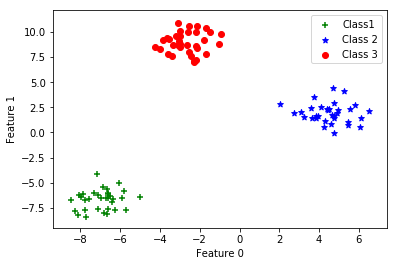

In [35]:
colors=['r','b','g']
markers=['o','*','+']
for X1,X2,label in zip(X[:, 0], X[:, 1],y):
    plt.scatter(X1,X2,color=colors[label],marker=markers[label])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class1','Class 2','Class 3'])

In [33]:
linear_svm=LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


There are 3 w vectors and 3 b for each of the 3 classes

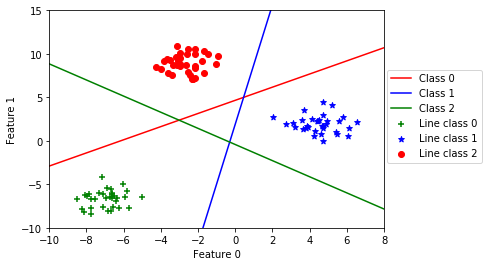

In [39]:
colors=['r','b','g']
markers=['o','*','+']
for X1,X2,label in zip(X[:, 0], X[:, 1],y):
    plt.scatter(X1,X2,color=colors[label],marker=markers[label])
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['r', 'b', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
 'Line class 2'], loc=(1.01, 0.3))

A point in the middle of the triange will be assigned to the nearest class.